In [1]:
#show the data
from sklearn import datasets
import matplotlib.pyplot as plt

iris_df = datasets.load_iris()

#available methods on datasets
print(dir(iris_df))

['DESCR', 'data', 'feature_names', 'target', 'target_names']


In [2]:
#show the features
print(iris_df.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
#print the target names
print(iris_df.target_names)
label={0:'red',1:'blue',2:'green'}

['setosa' 'versicolor' 'virginica']


In [4]:
#dataset slicing
x_axis = iris_df.data[:,0] #length
y_axis = iris_df.data[:,2] #width

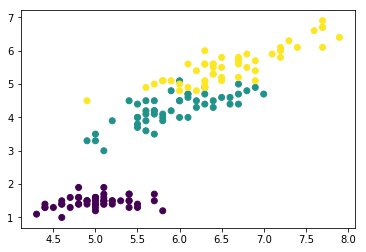

In [5]:
#plotting
plt.scatter(x_axis,y_axis,c=iris_df.target)
plt.show()

In [2]:
#okay , now I will show your guys the K-means algorithm
from sklearn import datasets
from sklearn.cluster import KMeans

#declaring model
model = KMeans(n_clusters=3)

iris_df = datasets.load_iris()

#fitting model
model.fit(iris_df.data)
#predicting a single input
predict_label = model.predict([[7.2,3.5,0.8,1.6]])

#prediction on the entire data
all_predicitons = model.predict(iris_df.data)

#printing predictions
print(predict_label)
print(all_predicitons)


[0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [4]:
# now it is turn to Hierarchical clustering 
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import pandas as pd

#read the dataframe
seeds_df = pd.read_csv("https://raw.githubusercontent.com/vihar/unsupervised-learning-with-python/master/seeds-less-rows.csv")

#remove the grain species from the dataframe , save for later
varieties = list(seeds_df.pop('grain_variety'))

#extract the mearsurements as a numpy array
samples = seeds_df.values

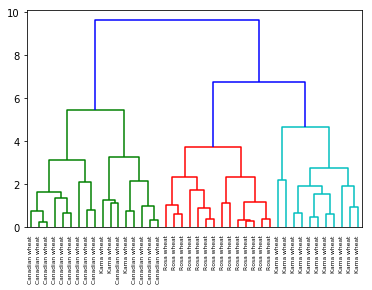

In [5]:
#perform hierarchical clustering on samples using the linkage() function with method= 'complete'

mergings = linkage(samples,method='complete')

#plot a dendrogram using the dendrogram() function on merging

dendrogram(mergings,labels=varieties,leaf_rotation=90,leaf_font_size=6,)

plt.show()

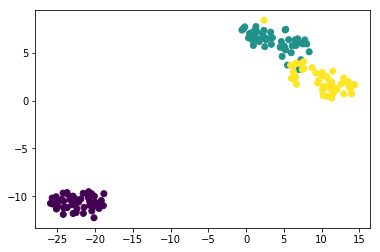

In [6]:
# now I would introduce t-SNE to you
# t-SNE means t-distributed stochastic neighborembedding

from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

#loading dataset
iris_df = datasets.load_iris()

#defining model
model = TSNE(learning_rate=100)

#fitting model
transformed = model.fit_transform(iris_df.data)

#plotting 2d t-SNE
x_axis = transformed[:,0]
y_axis = transformed[:,1]

plt.scatter(x_axis,y_axis,c=iris_df.target)

plt.show()

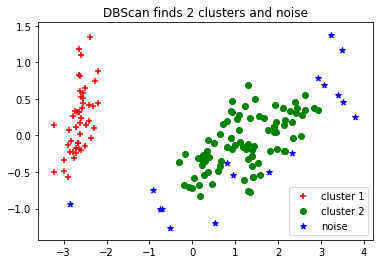

In [8]:
#lastly , time for DBScan 
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

#load dataset again
iris = load_iris()

#declaring model
dbscan = DBSCAN()

#fitting 
dbscan.fit(iris.data)

pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)

#plot based on class

for i in range(0,pca_2d.shape[0]):
    if dbscan.labels_[i]==0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    elif dbscan.labels_[i]==1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    elif dbscan.labels_[i]==-1:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
        
plt.legend([c1,c2,c3],['cluster 1','cluster 2','noise'])
plt.title('DBScan finds 2 clusters and noise')
plt.show()